# Import module

In [2]:
import pandas as pd
import jaconv
from bs4 import BeautifulSoup 
from urllib import request
from urllib.error import HTTPError
import matplotlib.pyplot as plt
import numpy as np
import pickle
import datetime

# Change fontype of pyplot
import matplotlib.font_manager
#print([f.name for f in matplotlib.font_manager.fontManager.ttflist])
plt.rcParams['font.family'] = 'MS Gothic'
# For mac use
#plt.rcParams['font.family'] = 'AppleGothic'



# Load

In [3]:
# Load
df = pd.read_csv("SuperD_Class5_keiki.csv",low_memory=False)

# change to datetime format
df["date"] = pd.to_datetime(df["date"],format="%Y_%m_%d")

# Restrict Data 

Text(0, 0.5, 'count')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

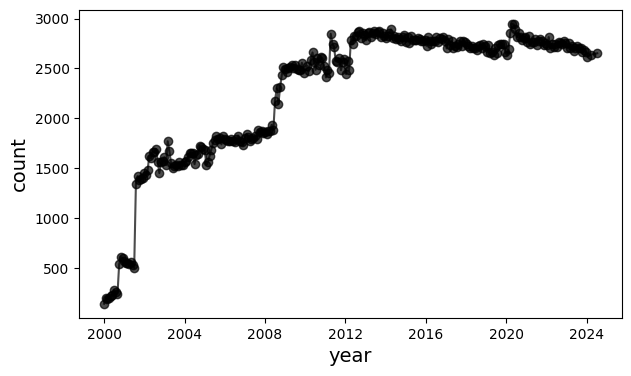

In [4]:
# check
df_date = pd.DataFrame(df.groupby(["date"]).size())
df_date.reset_index(inplace=True)
df_date.columns = ["date","cnt"]

# plot
plt.figure(figsize=(7,4))
plt.plot(df_date["date"],df_date["cnt"],marker="o",color="k",alpha=0.7)
plt.xlabel("year",size=14)
plt.ylabel("count",size=14)
#plt.title("now")


In [5]:
len(df)

656079

# Analyze Genjyo

In [6]:
cond = df["type"] == "now"
df_now = df.loc[cond].copy()

cond = df["type"] == "future"
df_future = df.loc[cond].copy()

# aggregate by date
df_now_date = pd.DataFrame(df_now.groupby("date").mean("label"))

# aggregate by date
df_future_date = pd.DataFrame(df_future.groupby("date").mean("label"))

Text(0.5, 1.0, 'genjyou vs sakiyuki')

findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 

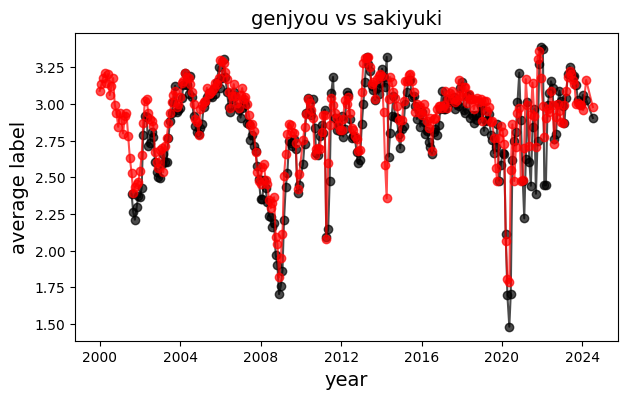

In [7]:
plt.figure(figsize=(7,4))
plt.plot(df_now_date["label"],marker="o",color="k",alpha=0.7)
plt.xlabel("year",size=14)
plt.ylabel("average label",size=14)

plt.plot(df_future_date["label"],marker="o",color="r",alpha=0.7)
plt.title("genjyou vs sakiyuki",size=14)

# Compare with GDP

In [8]:
import pandas_datareader.data as web
start="1945/1/1"

ModuleNotFoundError: No module named 'pandas_datareader'

In [8]:
# Daily data
df_gdp= web.DataReader("JPNRGDPEXP", 'fred',start)#Population, Total for World
#import py4macro
#df_gdp = pd.DataFrame(py4macro.data('jpn-q')["gdp"])
df_gdp.reset_index(inplace=True)
df_gdp.columns = ["date","gdp"]

df_gdp["date"] = pd.to_datetime(df_gdp["date"])
df_gdp["log_gdp"] = np.log(df_gdp["gdp"])
df_gdp["growth"] = df_gdp["log_gdp"].diff(1)
cond = df_gdp["date"] >= datetime.datetime.strptime("2000-01-01","%Y-%m-%d")
df_gdp = df_gdp.loc[cond].copy()

Text(0.5, 1.0, 'genjyou, sakiyuki, GDP')

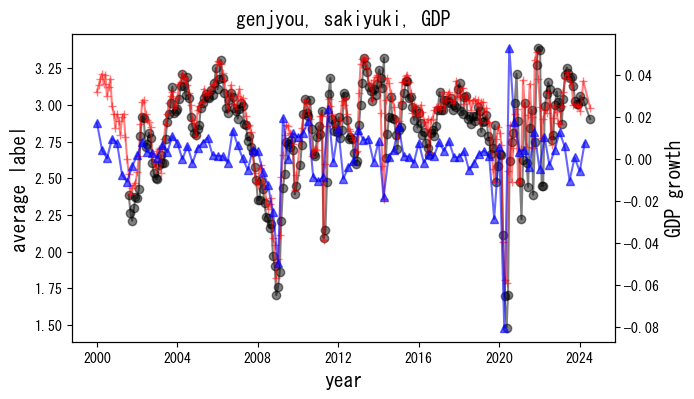

In [9]:
plt.figure(figsize=(7,4))
plt.plot(df_now_date["label"],marker="o",color="k",alpha=0.5)
plt.xlabel("year",size=14)
plt.ylabel("average label",size=14)
plt.plot(df_future_date["label"],marker="+",color="r",alpha=0.5)

plt.twinx()
plt.plot(df_gdp["date"],df_gdp["growth"],marker="^",color="b",alpha=0.6)
plt.ylabel("GDP growth",size=14)
plt.title("genjyou, sakiyuki, GDP",size=14)

# Assignment 3

In [10]:
# Calculate the moving average and standard deviation
window_size = 12  # 1-year window
df_future_date['rolling_mean'] = df_future_date['label'].rolling(window=window_size).mean()
df_future_date['rolling_std'] = df_future_date['label'].rolling(window=window_size).std()

# Set the threshold for anomaly detection (using 2 standard deviations)
threshold = 2
df_future_date['upper_bound'] = df_future_date['rolling_mean'] + (threshold * df_future_date['rolling_std'])
df_future_date['lower_bound'] = df_future_date['rolling_mean'] - (threshold * df_future_date['rolling_std'])

# Identify the anomalies
df_future_date['is_anomaly'] = (df_future_date['label'] > df_future_date['upper_bound']) | \
                              (df_future_date['label'] < df_future_date['lower_bound'])


findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 


Anomalies in Future Data:
date
2000-12-01    2.844113
2001-09-01    2.394509
2006-01-01    3.298204
2007-07-01    2.856802
2007-10-01    2.675706
2007-11-01    2.538549
2008-10-01    2.091769
2008-12-01    1.817955
2011-04-08    2.076976
2013-02-08    3.280876
2014-02-10    2.947958
2014-03-10    2.587013
2014-04-08    2.356725
2016-07-08    2.679547
2017-11-09    3.162568
2019-01-11    2.884479
2019-08-08    2.766207
2019-09-09    2.563218
2019-10-08    2.472222
2020-03-09    2.063872
2020-04-08    1.804418
Name: label, dtype: float64


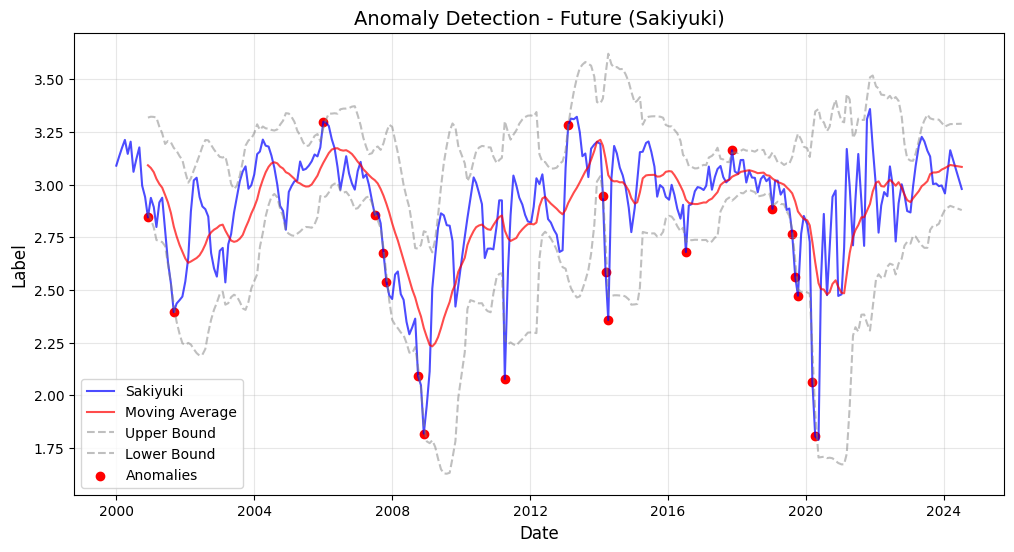

In [11]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_future_date.index, df_future_date['label'], label='Sakiyuki', color='blue', alpha=0.7)
plt.plot(df_future_date.index, df_future_date['rolling_mean'], label='Moving Average', color='red', alpha=0.7)
plt.plot(df_future_date.index, df_future_date['upper_bound'], '--', label='Upper Bound', color='gray', alpha=0.5)
plt.plot(df_future_date.index, df_future_date['lower_bound'], '--', label='Lower Bound', color='gray', alpha=0.5)
plt.scatter(df_future_date[df_future_date['is_anomaly']].index, 
           df_future_date[df_future_date['is_anomaly']]['label'],
           color='red', label='Anomalies')
plt.title('Anomaly Detection - Future (Sakiyuki)', size=14)
plt.xlabel('Date', size=12)
plt.ylabel('Label', size=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Print the anomalies
print("\nAnomalies in Future Data:")
anomalies_future = df_future_date[df_future_date['is_anomaly']]
print(anomalies_future['label'])


In [12]:

# Genjyou (Current) Analysis
# Calculate the moving average and standard deviation
df_now_date['rolling_mean'] = df_now_date['label'].rolling(window=window_size).mean()
df_now_date['rolling_std'] = df_now_date['label'].rolling(window=window_size).std()

# Set the threshold for anomaly detection
df_now_date['upper_bound'] = df_now_date['rolling_mean'] + (threshold * df_now_date['rolling_std'])
df_now_date['lower_bound'] = df_now_date['rolling_mean'] - (threshold * df_now_date['rolling_std'])

# Identify the anomalies
df_now_date['is_anomaly'] = (df_now_date['label'] > df_now_date['upper_bound']) | \
                           (df_now_date['label'] < df_now_date['lower_bound'])


findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: Font family 'MS Gothic' not found.
findfont: 


Anomalies in Current Data:
date
2006-03-01    3.305677
2007-07-01    2.757331
2008-10-01    1.972112
2008-12-01    1.703732
2011-04-08    2.093305
2013-04-08    3.319181
2014-05-12    2.640755
2017-01-12    3.087127
2018-01-12    3.148148
2019-08-08    2.664852
2019-11-11    2.477658
2020-03-09    2.114159
2020-04-08    1.694819
2020-05-13    1.481404
Name: label, dtype: float64


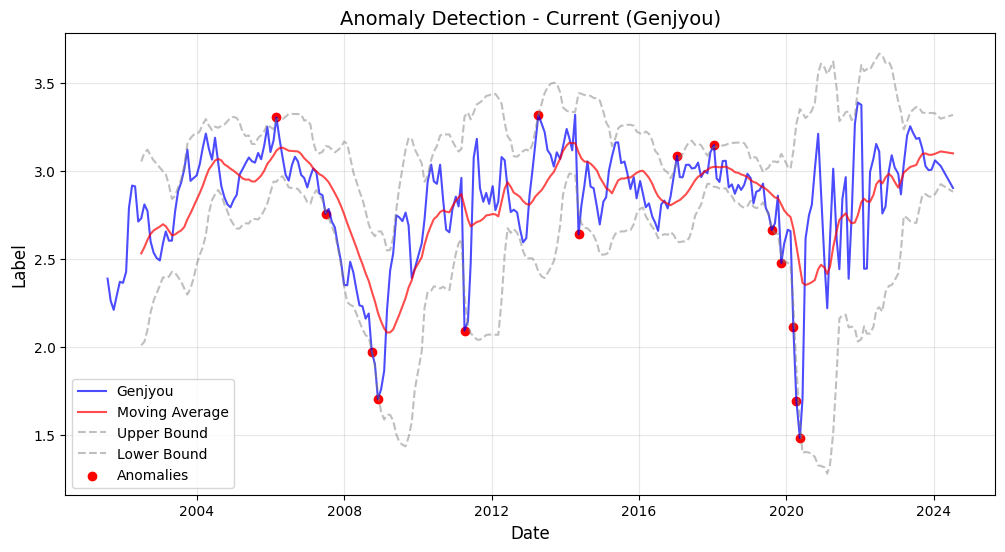

In [13]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(df_now_date.index, df_now_date['label'], label='Genjyou', color='blue', alpha=0.7)
plt.plot(df_now_date.index, df_now_date['rolling_mean'], label='Moving Average', color='red', alpha=0.7)
plt.plot(df_now_date.index, df_now_date['upper_bound'], '--', label='Upper Bound', color='gray', alpha=0.5)
plt.plot(df_now_date.index, df_now_date['lower_bound'], '--', label='Lower Bound', color='gray', alpha=0.5)
plt.scatter(df_now_date[df_now_date['is_anomaly']].index, 
           df_now_date[df_now_date['is_anomaly']]['label'],
           color='red', label='Anomalies')
plt.title('Anomaly Detection - Current (Genjyou)', size=14)
plt.xlabel('Date', size=12)
plt.ylabel('Label', size=12)
plt.legend()
plt.grid(True, alpha=0.3)

# Print the anomalies
print("\nAnomalies in Current Data:")
anomalies_now = df_now_date[df_now_date['is_anomaly']]
print(anomalies_now['label'])